# Analysis of Groceries Dataset

In [1]:
#Importing the required libraries
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #Linear algebra
import matplotlib.pyplot as plt #Visualization library
import seaborn as sns #Visualization library
%matplotlib inline


In [2]:
#Reading the csv file:Groceries_dataset as df
df=pd.read_csv('D:\Groceries_dataset.csv')

In [3]:
#Printing the data upto 5 rows
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [31]:
#Checking the dimension of the dataset
df.shape

(38765, 3)

In [4]:
#Retrieving some info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
#Retrieving some statistical values about the dataset
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [9]:
#Checking the datatypes of the features
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [13]:
#Finding the number of unique items in the dataset
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [15]:
#Listing the unique items
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [16]:
#Finding how many item descriptions are unique
df['itemDescription'].nunique()

167

In [19]:
#Counting the values of item descriptions
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

In [63]:
#Top 5 items sold
df.itemDescription.value_counts().head()

In [23]:
#Least bought items
df.itemDescription.value_counts().tail()

rubbing alcohol          5
bags                     4
baby cosmetics           3
preservation products    1
kitchen utensil          1
Name: itemDescription, dtype: int64

In [24]:
#Finding the number of customers
df['Member_number'].nunique()

3898

In [43]:
#Listing the unique customer ids
df['Member_number'].unique()


array([1808, 2552, 2300, ..., 3607, 4587, 2417], dtype=int64)

In [26]:
#Top 5 customer ids
df.Member_number.value_counts().head()

3180    36
3050    33
2051    33
3737    33
2433    31
Name: Member_number, dtype: int64

In [27]:
#Least bought Customer ids
df.Member_number.value_counts().tail()


4565    2
2373    2
3788    2
2614    2
2844    2
Name: Member_number, dtype: int64

In [91]:
#Time duration of the given data
df.Date.min()


Timestamp('2014-01-01 00:00:00')

In [92]:
df.Date.max()

Timestamp('2015-12-30 00:00:00')

In [76]:
#Seperating Year from date
df['Date'].iloc[0]
df['Date']= pd.to_datetime(df['Date'])
df['Date']
type(df['Date'].iloc[0])
time.year


2015

In [78]:
time.day

21

In [80]:
time.month

7

In [81]:
#Creating an year column to the dataset
df['Year']=df['Date'].apply(lambda time:time.year)

In [83]:
#The updated dataset
df

,Member_number,Date,itemDescription,Year
0,1808,2015-07-21,tropical fruit,2015
1,2552,2015-05-01,whole milk,2015
2,2300,2015-09-19,pip fruit,2015
3,1187,2015-12-12,other vegetables,2015
4,3037,2015-01-02,whole milk,2015
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014
38761,2022,2014-02-23,candy,2014
38762,1097,2014-04-16,cake bar,2014
38763,1510,2014-03-12,fruit/vegetable juice,2014


In [89]:
#Grouping by year
byYear=df.groupby('Year')['itemDescription'].count()

In [110]:
#Displaying how many items were sold in respective years
byYear

Year
2014    18277
2015    20488
Name: itemDescription, dtype: int64

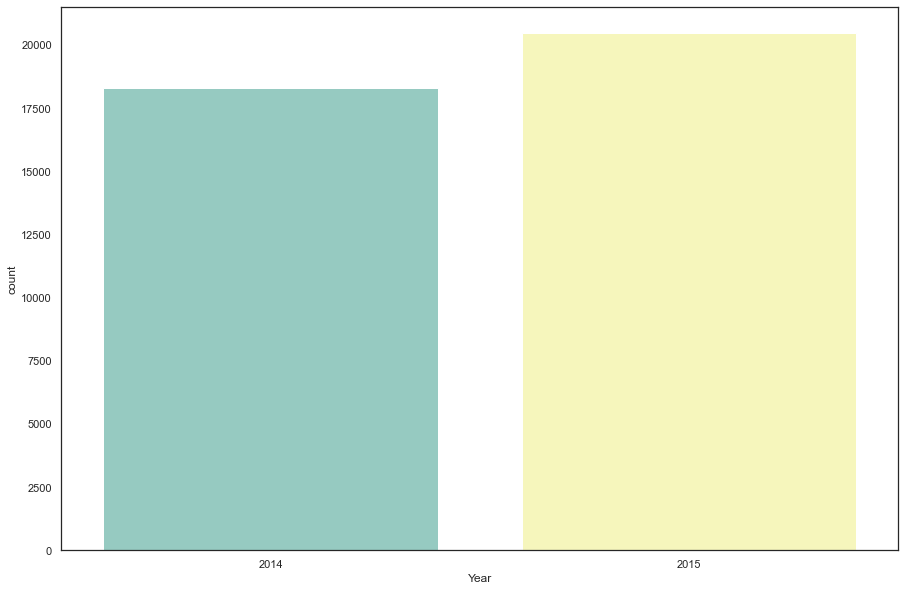

In [114]:
#Visualization of items sold by year
sns.countplot(x="Year", data=df, palette="Set3")

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64


Text(0, 0.5, 'Item Description distribution')

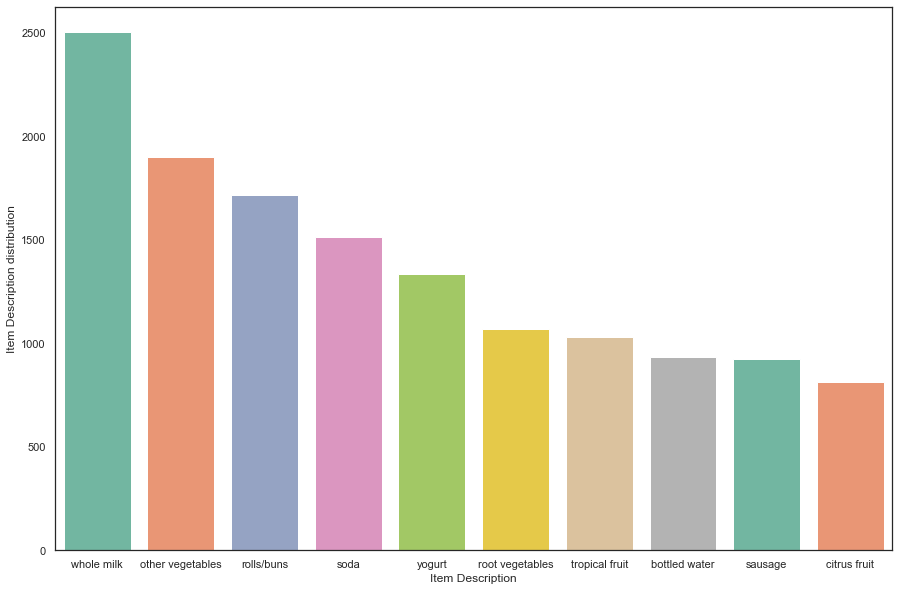

In [106]:
# Analyze distribution in Item Description in range 10
print(df.itemDescription.value_counts()[:10])
sns.barplot(x=df.itemDescription.value_counts()[:10].index,
y=df.itemDescription.value_counts()[:10].values,
palette='Set2')
plt.xlabel('Item Description')
plt.ylabel('Item Description distribution')

My inferences from the Groceries_dataset :<br>
1. We have the data from jan 1st 2014 to december 30th 2015.<br>
2. Most purchased item from the grocery is whole milk and it has been sold 2502 times.<br>
3. Least purchased items are preservation products (1) and kitchen utensils(1).<br>
4. Customer id: 3180 is the most frequent customer and he has purchased items 36 times.<br>
5. 18277 items has been sold in the year 2014.<br>
6. 20488 items has been sold in the year 2015.That is the sale has been increased in 2015 compared to 2014.<br>
7. This grocery might be near to some apartments where people purchase their daily food items.<br>